In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

# CẤU HÌNH

In [2]:
# Cấu hình hiển thị và khởi tạo đường dẫn dữ liệu
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("--- KHỞI TẠO EDA ---")

try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

DATA_PATH = os.path.join(BASE_DIR, 'data', 'Telco_Customer_Churn.csv')

if not os.path.exists(DATA_PATH):
    DATA_PATH = os.path.join(BASE_DIR, 'Telco_Customer_Churn.csv')
    if not os.path.exists(DATA_PATH):
        print(f"CẢNH BÁO: Không tìm thấy file dữ liệu tại: {DATA_PATH}")
    else:
        print(f"Đã tìm thấy dữ liệu tại gốc: {DATA_PATH}")
else:
    print(f"Đã tìm thấy dữ liệu: {DATA_PATH}")

folder_1 = os.path.join(BASE_DIR, 'folder_clean_visual')
folder_2 = os.path.join(BASE_DIR, 'folder_standardized')

os.makedirs(folder_1, exist_ok=True)
os.makedirs(folder_2, exist_ok=True)

print(f"Đã kiểm tra/tạo thư mục output:\n - {folder_1}\n - {folder_2}")

--- KHỞI TẠO EDA ---
Đã tìm thấy dữ liệu: d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\data\Telco_Customer_Churn.csv
Đã kiểm tra/tạo thư mục output:
 - d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\folder_clean_visual
 - d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\folder_standardized


# LOAD DATA

In [3]:
def load_data():
    """
    Đọc dữ liệu từ CSV và hiển thị thông tin cơ bản.
    
    Returns:
        DataFrame: Dữ liệu được tải
    """
    global df
    print("\n1. LOAD DATA")
    try:
        df = pd.read_csv(DATA_PATH)
        print(f"✓ Đọc file thành công. Shape: {df.shape}")
        print("\nThông tin DataFrame:")
        print(df.info())
        print("\nMô tả thống kê của DataFrame:")
        print(df.describe())  
        print("\n5 dòng mẫu của DataFrame:")
        print(df.sample(5))
        return df
    except Exception as e:
        print(f"✗ Lỗi đọc file: {e}")
        exit() 

df = load_data()


1. LOAD DATA
✓ Đọc file thành công. Shape: (7043, 21)

Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract    

# DATA QUALITY

In [4]:
def assess_data_quality(df_input):
    """
    Đánh giá chất lượng dữ liệu: kiểm tra missing values, duplicates, 
    inconsistency và tính nhất quán của các giá trị.
    
    Args:
        df_input (DataFrame): Dữ liệu cần đánh giá
    """
    print("\n--- ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ---")
    
    # Kiểm tra Missing Values
    missing = df_input.isnull().sum()
    missing_pct = (missing / len(df_input)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    
    if not missing_df.empty:
        print("\n- Cảnh báo: Các cột chứa giá trị thiếu:")
        print(missing_df)
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_input.isnull(), cbar=False, cmap='viridis')
        plt.title('Bản đồ vị trí dữ liệu thiếu (Missing Data Heatmap)')
        plt.show()
    else:
        print("\n- Không có giá trị thiếu (missing values)")

    # Kiểm tra Trùng lặp
    duplicates = df_input.duplicated().sum()
    print(f"\n- Số dòng trùng lặp hoàn toàn: {duplicates}")
    if duplicates > 0:
        print("   → Đang loại bỏ các dòng trùng lặp...")
        df_input.drop_duplicates(inplace=True)

    # Kiểm tra Giá trị duy nhất của biến phân loại
    print("\n- Kiểm tra giá trị duy nhất của biến phân loại:")
    cat_cols = df_input.select_dtypes(include='object').columns
    for col in cat_cols:
        unique_vals = df_input[col].unique()
        if len(unique_vals) < 10:
            print(f"   - {col}: {unique_vals}")

assess_data_quality(df)


--- ĐÁNH GIÁ CHẤT LƯỢNG DỮ LIỆU ---

- Không có giá trị thiếu (missing values)

- Số dòng trùng lặp hoàn toàn: 0

- Kiểm tra giá trị duy nhất của biến phân loại:
   - gender: ['Female' 'Male']
   - Partner: ['Yes' 'No']
   - Dependents: ['No' 'Yes']
   - PhoneService: ['No' 'Yes']
   - MultipleLines: ['No phone service' 'No' 'Yes']
   - InternetService: ['DSL' 'Fiber optic' 'No']
   - OnlineSecurity: ['No' 'Yes' 'No internet service']
   - OnlineBackup: ['Yes' 'No' 'No internet service']
   - DeviceProtection: ['No' 'Yes' 'No internet service']
   - TechSupport: ['No' 'Yes' 'No internet service']
   - StreamingTV: ['No' 'Yes' 'No internet service']
   - StreamingMovies: ['No' 'Yes' 'No internet service']
   - Contract: ['Month-to-month' 'One year' 'Two year']
   - PaperlessBilling: ['Yes' 'No']
   - PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
   - Churn: ['No' 'Yes']


# CLEAN DATA

In [5]:
def clean_data(df_input, output_folder):
    """
    Làm sạch dữ liệu: loại bỏ cột vô ích, xử lý missing values, 
    duplicates, và chuẩn hóa định dạng chuỗi.
    
    Args:
        df_input (DataFrame): Dữ liệu gốc
        output_folder (str): Đường dẫn thư mục lưu kết quả
        
    Returns:
        DataFrame: Dữ liệu sau khi làm sạch
    """
    df = df_input.copy()
    print(f"\n2. CLEAN DATA")
    print(f"   Shape ban đầu: {df.shape}")

    # Loại bỏ cột định danh không có giá trị dự báo
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)
        print("   - Xóa cột 'customerID'")

    # Xử lý TotalCharges: chuyển đổi từ object thành numeric, xử lý " " -> NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    nan_count = df['TotalCharges'].isnull().sum()
    if nan_count > 0:
        df['TotalCharges'].fillna(0, inplace=True)
        print(f"   - Điền 0 cho {nan_count} dòng TotalCharges bị trống (tenure=0)")

    # Xử lý dòng trùng lặp
    dup_count = df.duplicated(keep='first').sum()

    if dup_count > 0:
        dup_representatives = (
            df
            .value_counts()
            .reset_index(name='lần lặp')
            .query("`lần lặp` > 1")
        )

        print("Đại diện các dòng trùng và số lần lặp của dòng:")
        display(dup_representatives)

        print(f"   - Xóa {dup_count} dòng trùng lặp hoàn toàn")
        df = df.drop_duplicates()
    else:
        print("   - Không có dòng trùng lặp hoàn toàn")

    # Chuẩn hóa khoảng trắng thừa ở đầu/cuối các giá trị chuỗi
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].str.strip()
    print("   - Chuẩn hóa khoảng trắng cho các cột phân loại")

    # Kiểm tra và loại bỏ missing values còn lại (nếu có)
    remaining_missing = df.isnull().sum().sum()
    if remaining_missing > 0:
        print(f"   - Xóa {remaining_missing} dòng còn lại với giá trị thiếu")
        df.dropna(inplace=True)
    
    print(f"   Shape sau khi clean: {df.shape}")

    # Lưu file làm sạch
    clean_path = os.path.join(output_folder, 'telco_clean.csv')
    df.to_csv(clean_path, index=False)
    print(f"   → Lưu dữ liệu sạch tại: {clean_path}")
    
    return df

df = clean_data(df, folder_1)


2. CLEAN DATA
   Shape ban đầu: (7043, 21)
   - Xóa cột 'customerID'
   - Điền 0 cho 11 dòng TotalCharges bị trống (tenure=0)
Đại diện các dòng trùng và số lần lặp của dòng:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,lần lặp
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,3
1,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,3
2,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes,2
3,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No,2
4,Female,1,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes,2
5,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes,2
6,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.90,Yes,2
7,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,No,2
8,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.20,Yes,2
9,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,2


   - Xóa 22 dòng trùng lặp hoàn toàn
   - Chuẩn hóa khoảng trắng cho các cột phân loại
   Shape sau khi clean: (7021, 20)
   → Lưu dữ liệu sạch tại: d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\folder_clean_visual\telco_clean.csv


# VISUALIZE DATA

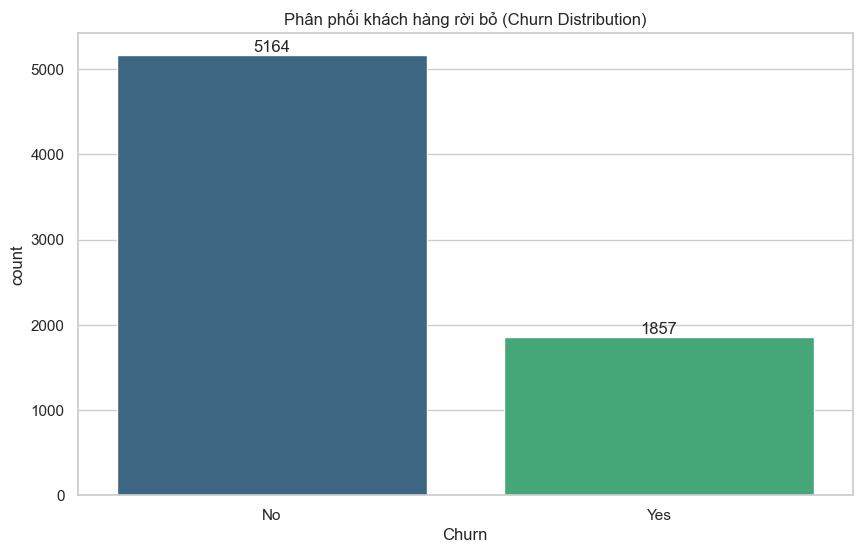

   - Lưu biểu đồ phân phối Churn


In [6]:
def plot_target_distribution():
    """Biểu đồ phân phối biến mục tiêu (Churn)"""
    plt.figure()
    ax = sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
    plt.title('Phân phối khách hàng rời bỏ (Churn Distribution)')
    for container in ax.containers:
        ax.bar_label(container)
    
    save_path = os.path.join(folder_1, 'target_distribution.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print("   - Lưu biểu đồ phân phối Churn")

plot_target_distribution()

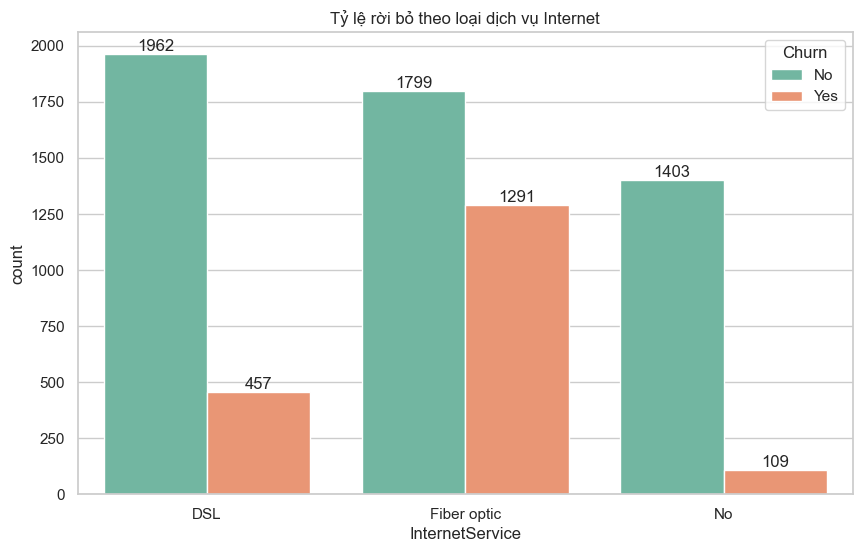

   - Lưu biểu đồ Internet Service vs Churn


In [7]:
def plot_internet_service_churn():
    """Biểu đồ tỷ lệ rời bỏ theo loại dịch vụ Internet"""
    plt.figure()
    ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
    plt.title('Tỷ lệ rời bỏ theo loại dịch vụ Internet')
    for container in ax.containers:
        ax.bar_label(container)
    
    save_path = os.path.join(folder_1, 'internet_service_churn.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print("   - Lưu biểu đồ Internet Service vs Churn")

plot_internet_service_churn()

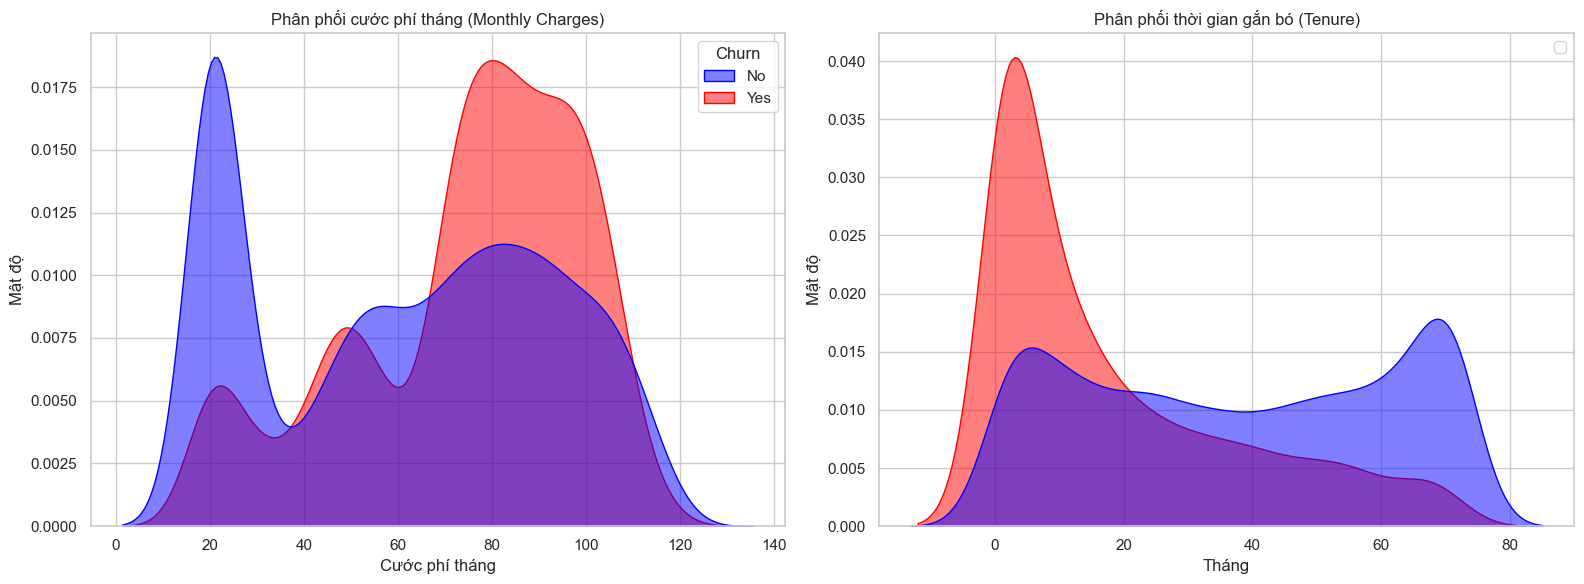

   - Lưu biểu đồ MonthlyCharges & Tenure
      → Insight: Khách hàng rời bỏ tập trung ở tháng đầu tiên (< 12 tháng)


In [8]:
def plot_numerical_distributions():
    """Biểu đồ phân phối các biến số chính: MonthlyCharges và tenure"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Phân phối cước phí tháng
    sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', 
                fill=True, common_norm=False, palette=['blue', 'red'], 
                alpha=0.5, ax=axes[0])
    axes[0].set_title('Phân phối cước phí tháng (Monthly Charges)')
    axes[0].set_xlabel('Cước phí tháng')
    axes[0].set_ylabel('Mật độ')

    # Phân phối thời gian gắn bó
    sns.kdeplot(data=df, x='tenure', hue='Churn', 
                fill=True, common_norm=False, palette=['blue', 'red'], 
                alpha=0.5, ax=axes[1])
    axes[1].set_title('Phân phối thời gian gắn bó (Tenure)')
    axes[1].set_xlabel('Tháng')
    axes[1].set_ylabel('Mật độ')
    axes[1].legend()

    plt.tight_layout()
    plt.savefig(os.path.join(folder_1, 'monthly_charges_tenure_kde.png'))
    plt.show()
    plt.close()
    print("   - Lưu biểu đồ MonthlyCharges & Tenure")
    print("      → Insight: Khách hàng rời bỏ tập trung ở tháng đầu tiên (< 12 tháng)")

plot_numerical_distributions()

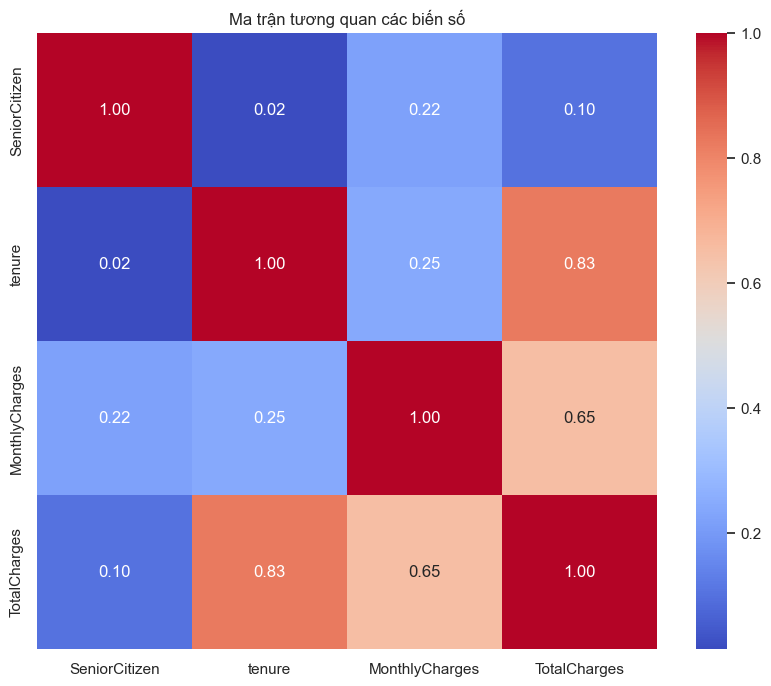

   - Lưu ma trận tương quan


In [9]:
def plot_correlation_matrix():
    """Ma trận tương quan của các biến số"""
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Ma trận tương quan các biến số')

    save_path = os.path.join(folder_1, 'correlation_matrix.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print("   - Lưu ma trận tương quan")

plot_correlation_matrix()

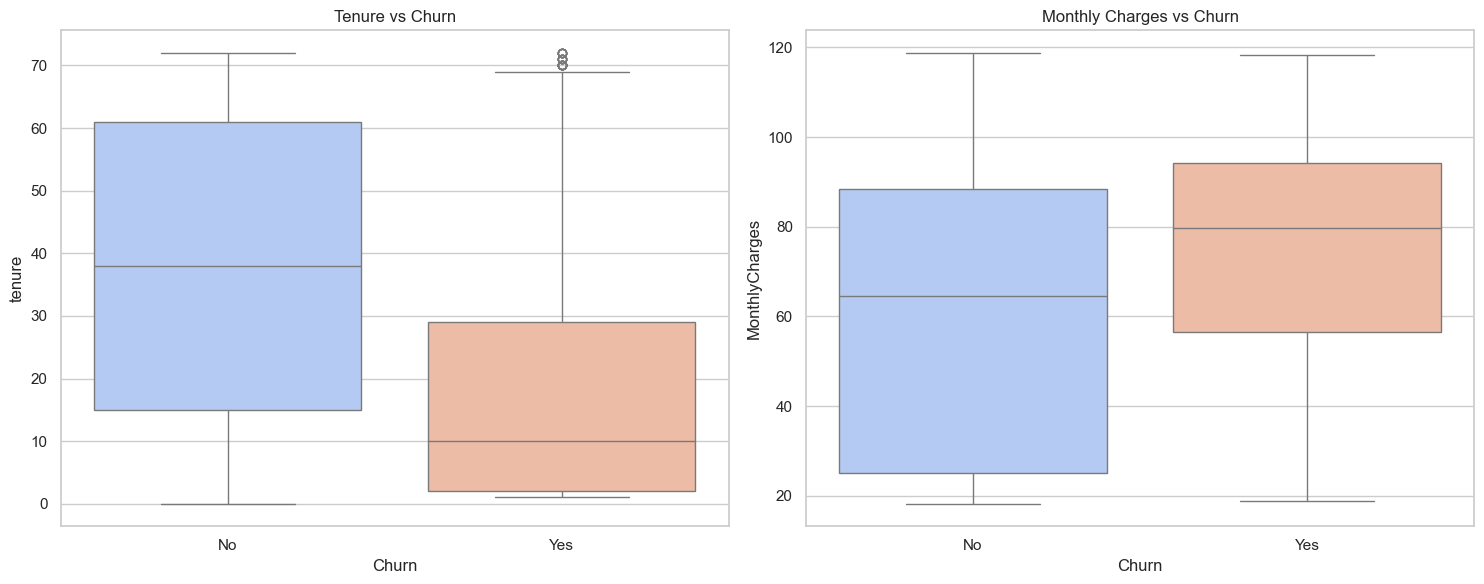

   - Lưu biểu đồ Box plot


In [10]:
def plot_boxplots():
    """Biểu đồ Box plot để kiểm tra ngoại lai trong dữ liệu số"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
    axes[0].set_title('Tenure vs Churn')
    
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='coolwarm')
    axes[1].set_title('Monthly Charges vs Churn')
    
    plt.tight_layout()
    plt.savefig(os.path.join(folder_1, 'numerical_boxplots.png'))
    plt.show()
    plt.close()
    print("   - Lưu biểu đồ Box plot")

plot_boxplots()

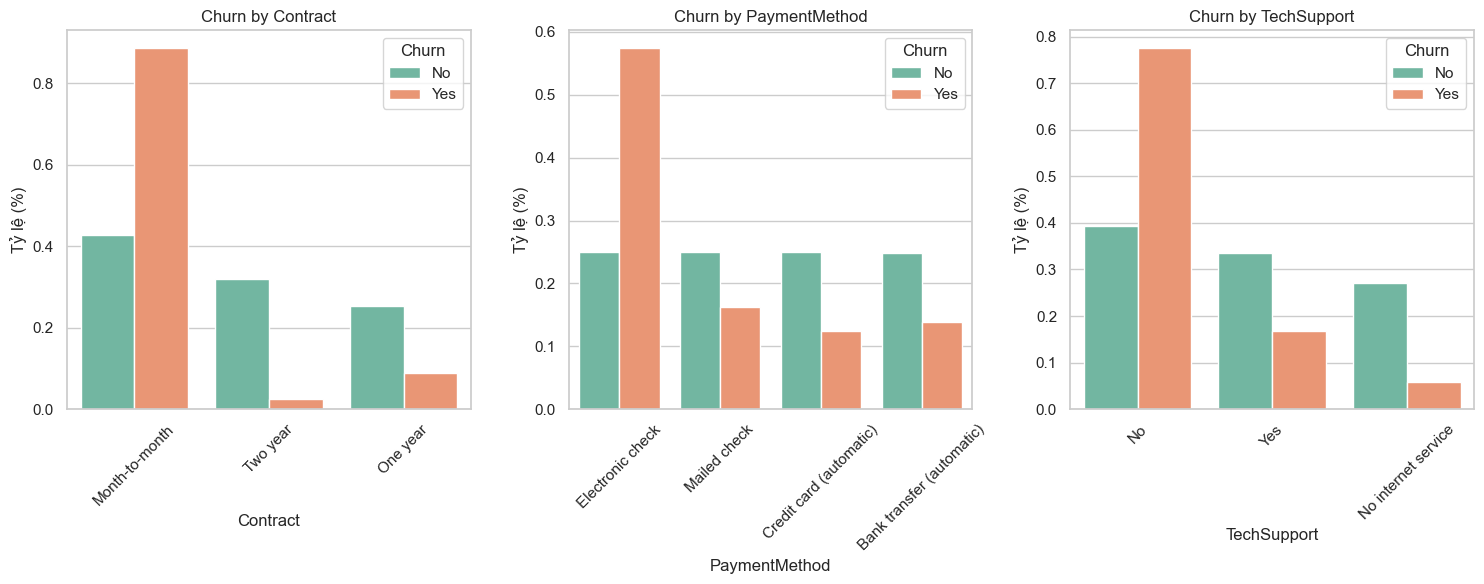

   - Lưu biểu đồ phân tích Contract/Payment/TechSupport


In [11]:
def plot_categorical_features():
    """Biểu đồ tỷ lệ rời bỏ theo các biến phân loại quan trọng"""
    features = ['Contract', 'PaymentMethod', 'TechSupport']
    
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(features):
        plt.subplot(1, 3, i + 1)
        prop_df = (df[col]
                   .groupby(df['Churn'])
                   .value_counts(normalize=True)
                   .rename('percentage')
                   .reset_index())
        
        sns.barplot(x=col, y='percentage', hue='Churn', data=prop_df, palette='Set2')
        plt.title(f'Churn by {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Tỷ lệ (%)')
    
    plt.tight_layout()
    plt.savefig(os.path.join(folder_1, 'key_categorical_churn.png'))
    plt.show()
    plt.close()
    print("   - Lưu biểu đồ phân tích Contract/Payment/TechSupport")

plot_categorical_features()